In [17]:
import pandas as pd # Reading csv files
import seaborn as sns # Graphing
import matplotlib.pyplot as plt # Graphing
import numpy as np # Math

%matplotlib inline

,DATE,CITY,VALUE
0,2019-01-01,Hyderabad,161.0
1,2019-01-01,Bhopal,175.0
2,2019-01-01,Chandigarh,163.0
3,2019-01-01,Delhi,341.0
4,2019-01-01,New Delhi,314.0


In [3]:
heart_df = pd.read_csv("datasets/heart.csv") # Read heart data
o2_df = pd.read_csv("datasets/o2Saturation.csv") # Read oxygen saturation data
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Removing outliers

from scipy.stats import zscore
heart_zscores = zscore(heart_df) # Zscore assigns a score in terms of standard deviation
abs_heart_zscores = np.abs(heart_zscores) # Get rid of negatives

# Filter out values who are more than 3 Standard deviations off from the mean
filtered_entries = (abs_heart_zscores < 3).all(axis=1) 
heart_df = heart_df[filtered_entries]
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.334495,0.689895,0.972125,131.024390,244.501742,0.142857,0.533101,149.804878,0.327526,1.004878,1.411150,0.658537,2.313589,0.550523
std,9.093125,0.463344,1.037373,16.991856,45.920719,0.350538,0.527017,22.550570,0.470131,1.080684,0.607311,0.924675,0.584703,0.498310
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='count'>

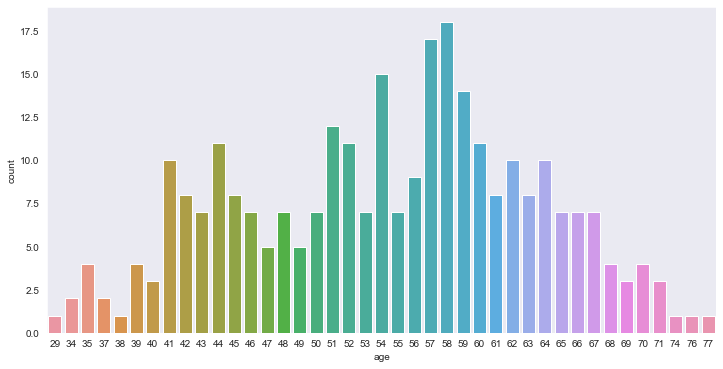

In [5]:
# Visualization of age distribution
plt.figure(figsize=(12, 6))
sns.set_style("dark")
sns.countplot(x="age", data=heart_df)


In [10]:
o2_zscores = zscore(o2_df) # Zscore assigns a score in terms of standard deviation
abs_o2_zscores = np.abs(o2_zscores) # Get rid of negatives

# Filter out values who are more than 3 Standard deviations off from the mean
filtered_entries = (abs_o2_zscores < 3).all(axis=1) 
o2_df = o2_df[filtered_entries]
o2_df.describe()

,98.6
count,3585.000000
mean,98.239275
std,0.726336
min,96.500000
25%,97.600000
50%,98.600000
75%,98.600000
max,99.600000


[Text(0.5, 0, 'Oxygen Saturation')]

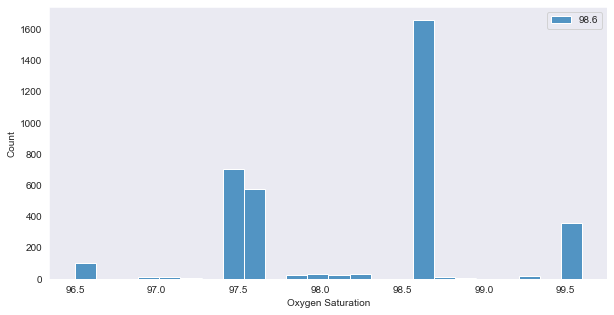

In [16]:
plt.figure(figsize=(10, 5))
sns.set_style("dark")
sns.histplot(data=o2_df).set(xlabel="Oxygen Saturation")

Text(0.5, 1.0, 'Gender distribution')

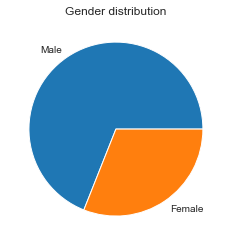

In [27]:
male_count = 0
female_count = 0

for value in heart_df["sex"]:
    if value == 0:
        female_count += 1
    else:
        male_count += 1

slices = [male_count, female_count]
labels = ["Male", "Female"]
plt.pie(slices, labels=labels, pctdistance=0.5)
plt.title("Gender distribution")